# Composites simulation :  plies with damage & plasticity

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from simmit import smartplus as sim
import os

dir = os.path.dirname(os.path.realpath('__file__'))

We need to import here the data, modify them if needed and proceed with
There are 17 parameters, that define the damage deterioration of the material,

Parameters 1-7 are the material properties and are constant per each material.

Parameters 8-17 define the damage in the shear direction coefficients used in the Ladeveze-Le Dantec model.

1. $E_L$ $\qquad$Longitudinal Young's modulus

2. $E_T$ $\qquad$Transverse Young's modulus

3. $\nu_{TL}$	$\qquad$Poisson Ratio transverse/longitudinal direction

4. $\nu_{TT}$	$\qquad$Poisson Ratio transverse/transverse direction

5. $G_{LT}$	$\qquad$In-plane shear modulus

6. $\alpha_L$	$\qquad$CTE (Coefficient of thermal expansion) in the longitudinal direction

7. $\alpha_T$	$\qquad$CTE (Coefficient of thermal expansion) in the transverse direction

8. $Y_{{12}_0}$	$\qquad$Critical driving force for damage in the shear direction

9. $Y_{{12}_c}$	$\qquad$Damage - driving force relation

10. $Y_{{22}_0}$$\qquad$Critical driving force for damage in the transverse direction

11. $Y_{{22}_c}$$\qquad$Damage - driving force relation

12. $Y_{{22}_u}$$\qquad$Ultimate damage driving force threshold

13. $b$	$\qquad$shear - transverse damage coupling parameter

14. $A$	$\qquad$shear - transverse plasticty coupling parameter ("equivalent to $a^2$ in Le Dantec")

15. $\sigma_{{ts}_0}$$\qquad$Yield limit for the onset of plasticity (Equivalent to $R_e$) in the shear/transverse (to fiber) directions

16. $\alpha_{ts}$$\qquad$Exponent

17. $\beta_{ts}$	$\qquad$Hardening coefficient





In [5]:
umat_name = 'MIPLN' #This is the 5 character code for the periodic homogenization for multlayered composite
nstatev = 0 #The number of scalar variables required, everything is stored in sub-phases statevs

rho = 1.12 #The density of the material (overall)
c_p = 1.64 #The specific heat capacity (overall)

nphases = 2 #The number of phases
num_file = 0 #The num of the file that contains the subphases

psi_rve = 0.
theta_rve = 0.
phi_rve = 0.

props = np.array([nphases, num_file])

NPhases_file = dir + '/data/Nlayers0.dat'
NPhases = pd.read_csv(NPhases_file, delimiter=r'\s+', index_col=False, engine='python')

pathfile = dir + '/co_pm45.txt'
outputfile = dir + '/results_PLN.txt'

NPhases[::]

,Number,umat,save,c,psi_mat,theta_mat,phi_mat,psi_geom,theta_geom,phi_geom,nprops,nstatev,props
0,0,LLDM0,1,0.5,45,0,0,0.0,90.0,-90.0,17,10,150000
1,1,LLDM0,1,0.5,-45,0,0,0.0,90.0,-90.0,17,10,150000


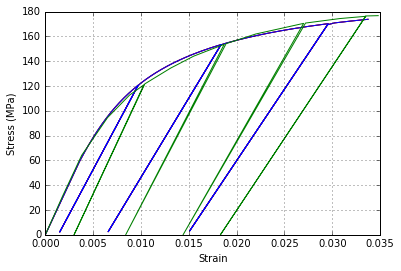

In [6]:
sim.solver(umat_name, props, nstatev, psi_rve, theta_rve, phi_rve, rho, c_p, pathfile, outputfile)

outputfile_macro = dir + '/results_PLN_global-0.txt'
outputfile_micro1 = dir + '/results_PLN_global-0-0.txt'
outputfile_micro2 = dir + '/results_PLN_global-0-1.txt'
outputfile_micro3 = dir + '/t300'

fig = plt.figure()

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_macro, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.grid(True)
plt.plot(e11,s11, c='black')

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_micro1, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.grid(True)
plt.plot(e11,s11, c='red')

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_micro2, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.grid(True)
plt.plot(e11,s11, c='blue')

e11,s11 = np.loadtxt(outputfile_micro3, usecols=(0,1), unpack=True)
plt.grid(True)
plt.plot(e11,s11, c='green')

plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')

plt.show()


In [ ]:
#pylab.rcParams['figure.figsize'] = (24.0, 5.0) #configure the figure output size

outputfile_micro1 = dir + '/results_PLN_local-0-0.txt'
outputfile_micro2 = dir + '/results_PLN_local-0-1.txt'

fig = plt.figure()

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_micro1, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.grid(True)
plt.plot(e11,s11, c='red')

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_micro2, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.grid(True)
plt.plot(e11,s11, c='blue')

plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')

plt.show()

e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_micro1, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.grid(True)
plt.plot(e12,s12, c='red')
e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_micro2, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.grid(True)
plt.plot(e12,s12, c='blue')

plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')

plt.show()


e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_micro1, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.grid(True)
plt.plot(e22,s22, c='red')
e11, e22, e33, e12, e13, e23, s11, s22, s33, s12, s13, s23 = np.loadtxt(outputfile_micro2, usecols=(8,9,10,11,12,13,14,15,16,17,18,19), unpack=True)
plt.grid(True)
plt.plot(e22,s22, c='blue')
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')

plt.show()